# Cubic Spline

#### First of I import some of library that is need for plotting and solving linear system

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import scipy.linalg as la

##### N is number of point that we want and n is the number of curve
##### In addition we want x to be on range[0-10] and it should be in order

In [83]:
N = 4
n = N-1
x = np.linspace(0, 10, N)
y = np.random.randint(0,6,N)

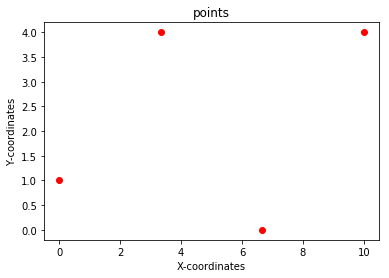

In [84]:
plt.plot(x,y,'ro')
plt.title('points')
plt.xlabel('X-coordinates')
plt.ylabel('Y-coordinates')
plt.show()

#### First of all we should get delta (domain) of x ( we may have different x[i] which leads to different dx in every curve)

In [85]:
dx = x[1] - x[0]

#### I use this formula to inner slots of b
#### b = 6 /dx * ( y {i-1} - 2 yi + y {i+1} )

In [86]:
b = np.zeros(n+1)
b[1:n] = (6.0/dx)*(y[0:n-1] - 2.0*y[1:n] + y[2:n+1])
b = b[1:n]
b

array([-12.6,  14.4])

#### We use "u" for upper diagnonal "d" for diagonal and "l" for lower diagnonal 

In [87]:
u = np.zeros(n-1)
d = np.zeros(n-1)
l = np.zeros(n-1)

d[:] = 4.0*dx

u[:] = dx
u[0] = 0.0

l[:] = dx
l[n-2] = 0.0

u,d,l

(array([0.        , 3.33333333]),
 array([13.33333333, 13.33333333]),
 array([3.33333333, 0.        ]))

#### This A matrix just Create 3 arrays which will represent the diagonal (d), the upper diagonal (u), and the lower diagnonal (l). 

In [88]:
A = np.matrix([u,d,l])
A

matrix([[ 0.        ,  3.33333333],
        [13.33333333, 13.33333333],
        [ 3.33333333,  0.        ]])

### solve linear system Ax = b with scipy library

In [89]:
xsol = la.solve_banded((1,1), A, b)
xsol

array([-1.296,  1.404])

### So beacuse we use natrual boundry we should set p'' == 0 at i = 0 and n (First and end poin)

In [90]:
pp = np.insert(xsol, 0, 0)
pp = np.insert(pp, n, 0)
pp

array([ 0.   , -1.296,  1.404,  0.   ])

### for ploting our curve we use x with 100 points for a smooth plot

In [107]:
def plot_spline(x0, x1, y0, y1, pp0, pp1):
    
    
    x = np.linspace(x0, x1, 100)
    dx = x1-x0

    alpha = pp1/(6.0*dx)
    beta = -pp0/(6.0*dx)

    gamma = (-pp1*dx*dx/6.0 + y1)/dx
    eta = (pp0*dx*dx/6.0 - y0)/dx

    p = alpha*(x-x0)**3 + beta*(x-x1)**3 + gamma*(x-x0) + eta*(x-x1)

    plt.plot(x,p)

#### I work on interval i , i+1 for curve between two points

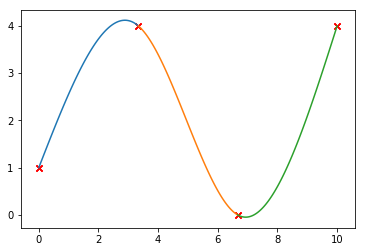

In [109]:
for i in range(n):

    pp_i = pp[i]
    pp_ip1 = pp[i+1]

    y_i = y[i]
    y_ip1 = y[i+1]

    x_i = x[i]
    x_ip1 = x[i+1]
    
    
    plt.scatter(x, y, marker="x", color="r")
    plot_spline(x_i, x_ip1, y_i, y_ip1, pp_i, pp_ip1)
